# Drivers

## Setup

In [1]:
import sys
print(sys.executable)
import lightlab.util.io as io
from lightlab.util.sweep import NdSweeper
import time
import datetime
import numpy
import matplotlib.pyplot as plt


C:\Anaconda2\envs\rezajing\python.exe


#### Laser setup

In [2]:
from lightlab.equipment.lab_instruments import hp816x_instr
channel1 = hp816x_instr.hp816x()
channel1.connect('GPIB0::30::INSTR', reset=0, forceTrans=1)
print(channel1.query('*IDN?'))#asks hp what it's id number is

a
<class 'bytes'> b'HEWLETT-PACKARD,HP8164A,DE38700815,V5.25(72630)\n'
The mainframe is: HP8164A
Connected to the laser
HEWLETT-PACKARD,HP8164A,DE38700815,V5.25(72630)


#### Sourcemeter setup

In [3]:
from lightlab.equipment.lab_instruments import Ke26XXA as Ke
Keithely = Ke.Ke26XXA()
Keithely.connect('GPIB0::29::INSTR')

#### Dark current-voltage scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_prog5ofp28ea
Generic sweep in Voltage
Dim-0...
1/600...
2/600...
3/600...
4/600...
5/600...
6/600...
7/600...
8/600...
9/600...
10/600...
11/600...
12/600...
13/600...
14/600...
15/600...
16/600...
17/600...
18/600...
19/600...
20/600...
21/600...
22/600...
23/600...
24/600...
25/600...
26/600...
27/600...
28/600...
29/600...
30/600...
31/600...
32/600...
33/600...
34/600...
35/600...
36/600...
37/600...
38/600...
39/600...
40/600...
41/600...
42/600...
43/600...
44/600...
45/600...
46/600...
47/600...
48/600...
49/600...
50/600...
51/600...
52/600...
53/600...
54/600...
55/600...
56/600...
57/600...
58/600...
59/600...
60/600...
61/600...
62/600...
63/600...
64/600...
65/600...
66/600...
67/600...
68/600...
69/600...
70/600...
71/600...
72/600...
73/600...
74/600...
75/600...
76/600...
77/600...
78/600...
79/600...
80/600...
81/600...
82/600...
83/600...
84/600...
85/600...
86/600...
87/600...
88/600...
89/600...
90/600

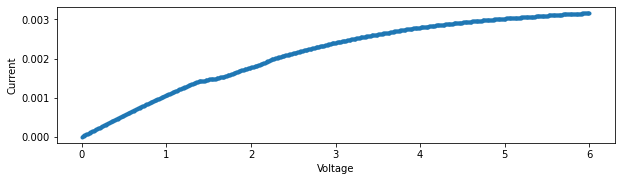

In [6]:
def I_dark(vi,vf,steps,filename):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    '''
    domain=numpy.linspace(vi,vf,steps)#sets up range of voltage values
    channel1.setTLSState('off')#turns laser off
    Keithely.setCurrentMeasurementRange(10e-3,chan='a')
    Keithely.setCurrentLimit(10e-3,chan='a') #
    Keithely.outputenable(True)#enables keithley to send voltage
    testsweep = NdSweeper()#lightlab sweeping module
    testsweep.addActuation('Voltage', lambda v: Keithely.setVoltage(v,chan='a'),domain)#tells lightlab sweeper package to sweep voltage across domain 
    testsweep.addMeasurement('Current', lambda: Keithely.getCurrent(chan='a'))#tells lightlab sweeper package to measure current
    testsweep.gather(3)#tells sweeper package to sweep after waiting 3 seconds
    testsweep.saveObj(filename)#save file
    Keithely.setVoltage(0)#sets voltage back to 0
    testsweep.plot()#plots
I_dark(0,4,400,'test_modular_dark')

#### Light current-voltage scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_prog701ml6ll
Generic sweep in Voltage
Dim-0...
1/600...
2/600...
3/600...
4/600...
5/600...
6/600...
7/600...
8/600...
9/600...
10/600...
11/600...
12/600...
13/600...
14/600...
15/600...
16/600...
17/600...
18/600...
19/600...
20/600...
21/600...
22/600...
23/600...
24/600...
25/600...
26/600...
27/600...
28/600...
29/600...
30/600...
31/600...
32/600...
33/600...
34/600...
35/600...
36/600...
37/600...
38/600...
39/600...
40/600...
41/600...
42/600...
43/600...
44/600...
45/600...
46/600...
47/600...
48/600...
49/600...
50/600...
51/600...
52/600...
53/600...
54/600...
55/600...
56/600...
57/600...
58/600...
59/600...
60/600...
61/600...
62/600...
63/600...
64/600...
65/600...
66/600...
67/600...
68/600...
69/600...
70/600...
71/600...
72/600...
73/600...
74/600...
75/600...
76/600...
77/600...
78/600...
79/600...
80/600...
81/600...
82/600...
83/600...
84/600...
85/600...
86/600...
87/600...
88/600...
89/600...
90/600

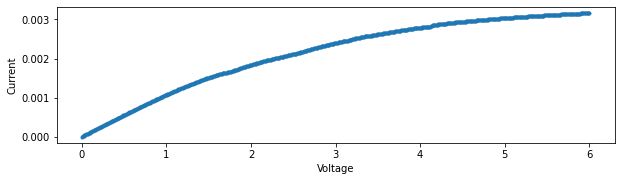

In [7]:
def I_light(vi,vf,steps,filename,wave=.00000155,power=0):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(vi,vf,steps)
    Keithely.setCurrentMeasurementRange(10e-3,chan='a')
    Keithely.setCurrentLimit(10e-3,chan='a') 
    Keithely.outputenable(True)
    channel1.setwavelength(wave)#sets laser's wavelength
    channel1.set_output_power(power)#set laser's optical power
    channel1.setTLSState('on')#turns laser on
    testsweep = NdSweeper()
    testsweep.addActuation('Voltage', lambda v: Keithely.setVoltage(v,chan='a'),domain)
    testsweep.addMeasurement('Current', lambda: Keithely.getCurrent(chan='a'))
    testsweep.gather(3)
    testsweep.saveObj(filename)
    Keithely.setVoltage(0)
    testsweep.plot()
I_light(0,4,400,'test_light_modular')

#### Photocurrent scan

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progp56cq7pz
Generic sweep in Voltage
Dim-0...
1/100...
2/100...
3/100...
4/100...
5/100...
6/100...
7/100...
8/100...
9/100...
10/100...
11/100...
12/100...
13/100...
14/100...
15/100...
16/100...
17/100...
18/100...
19/100...
20/100...
21/100...
22/100...
23/100...
24/100...
25/100...
26/100...
27/100...
28/100...
29/100...
30/100...
31/100...
32/100...
33/100...
34/100...
35/100...
36/100...
37/100...
38/100...
39/100...
40/100...
41/100...
42/100...
43/100...
44/100...
45/100...
46/100...
47/100...
48/100...
49/100...
50/100...
51/100...
52/100...
53/100...
54/100...
55/100...
56/100...
57/100...
58/100...
59/100...
60/100...
61/100...
62/100...
63/100...
64/100...
65/100...
66/100...
67/100...
68/100...
69/100...
70/100...
71/100...
72/100...
73/100...
74/100...
75/100...
76/100...
77/100...
78/100...
79/100...
80/100...
81/100...
82/100...
83/100...
84/100...
85/100...
86/100...
87/100...
88/100...
89/100...
90/100

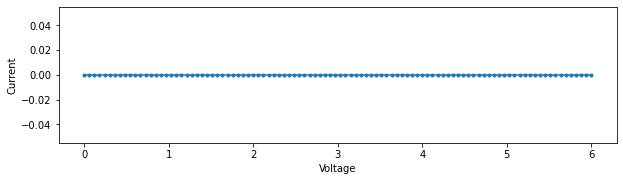

In [8]:
def I_ph(vi,vf,steps,filename,wave=.00000155,power=0):
    '''
    NOT WORKING god i hope i didn't kill everything
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(vi,vf,steps)
    Keithely.setCurrentMeasurementRange(10e-3,chan='a')
    Keithely.setCurrentLimit(10e-3,chan='a') 
    Keithely.outputenable(True)
    testsweep = NdSweeper()
    channel1.setwavelength(wave)
    channel1.set_output_power(power)
    channel1.setTLSState('off')
    testsweep.addActuation('Voltage', lambda v: Keithely.setVoltage(v,chan='a'),domain)
    testsweep.addMeasurement('Current', lambda: Keithely.getCurrent(chan='a'))
    testsweep.gather(3)
    storage=testsweep.data#stores data from dark sweep
    channel1.setTLSState('on')
    testsweep.gather(3)
    stor2=testsweep.data#stores data from ligth sweep
    for i in range(len(storage["Current"])):
        testsweep.data["Current"][i]=stor2["Current"][i]-storage["Current"][i]#finds the difference between the two
    Keithely.setVoltage(0)
    testsweep.saveObj(filename)
    testsweep.plot()
I_ph(0,4,400,'test_modular_photocurrent')

#### Optical Power and Voltage

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progm9tqwk5d
Generic sweep in Voltage
Dim-0...
1/600...
2/600...
3/600...
4/600...
5/600...
6/600...
7/600...
8/600...
9/600...
10/600...
11/600...
12/600...
13/600...
14/600...
15/600...
16/600...
17/600...
18/600...
19/600...
20/600...
21/600...
22/600...
23/600...
24/600...
25/600...
26/600...
27/600...
28/600...
29/600...
30/600...
31/600...
32/600...
33/600...
34/600...
35/600...
36/600...
37/600...
38/600...
39/600...
40/600...
41/600...
42/600...
43/600...
44/600...
45/600...
46/600...
47/600...
48/600...
49/600...
50/600...
51/600...
52/600...
53/600...
54/600...
55/600...
56/600...
57/600...
58/600...
59/600...
60/600...
61/600...
62/600...
63/600...
64/600...
65/600...
66/600...
67/600...
68/600...
69/600...
70/600...
71/600...
72/600...
73/600...
74/600...
75/600...
76/600...
77/600...
78/600...
79/600...
80/600...
81/600...
82/600...
83/600...
84/600...
85/600...
86/600...
87/600...
88/600...
89/600...
90/600

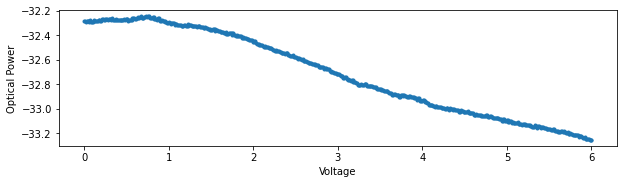

In [12]:
def P_v(vi,vf,steps,filename,wave=.00000155,power=0,laserchannel=1):
    '''
    vi=initial voltage in V
    vf=final voltage in V
    steps=steps inbetween vi and vf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(vi,vf,steps)
    Keithely.setCurrentMeasurementRange(10e-3,chan='a')
    Keithely.setCurrentLimit(10e-3,chan='a') 
    Keithely.outputenable(True)
    testsweep = NdSweeper()
    channel1.setwavelength(wave)
    channel1.set_output_power(power)
    channel1.setTLSState('on')
    testsweep.addActuation('Voltage', lambda v: Keithely.setVoltage(v),domain)
    testsweep.addMeasurement('Optical Power', lambda: channel1.readPWM(0,laserchannel))
    testsweep.gather(3)
    testsweep.saveObj(filename)
    Keithely.setVoltage(0)
    testsweep.plot()
P_v(0,4,400,'test_modular_pv')

#### Optical Power and Wavelength

Printing progress in tempfile C:\Users\Admin\progress-monitor\swp_progdus334ij
Generic sweep in Frequency
Dim-0...
1/1000...
2/1000...
3/1000...
4/1000...
5/1000...
6/1000...
7/1000...
8/1000...
9/1000...
10/1000...
11/1000...
12/1000...
13/1000...
14/1000...
15/1000...
16/1000...
17/1000...
18/1000...
19/1000...
20/1000...
21/1000...
22/1000...
23/1000...
24/1000...
25/1000...
26/1000...
27/1000...
28/1000...
29/1000...
30/1000...
31/1000...
32/1000...
33/1000...
34/1000...
35/1000...
36/1000...
37/1000...
38/1000...
39/1000...
40/1000...
41/1000...
42/1000...
43/1000...
44/1000...
45/1000...
46/1000...
47/1000...
48/1000...
49/1000...
50/1000...
51/1000...
52/1000...
53/1000...
54/1000...
55/1000...
56/1000...
57/1000...
58/1000...
59/1000...
60/1000...
61/1000...
62/1000...
63/1000...
64/1000...
65/1000...
66/1000...
67/1000...
68/1000...
69/1000...
70/1000...
71/1000...
72/1000...
73/1000...
74/1000...
75/1000...
76/1000...
77/1000...
78/1000...
79/1000...
80/1000...
81/1000...
82/

684/1000...
685/1000...
686/1000...
687/1000...
688/1000...
689/1000...
690/1000...
691/1000...
692/1000...
693/1000...
694/1000...
695/1000...
696/1000...
697/1000...
698/1000...
699/1000...
700/1000...
701/1000...
702/1000...
703/1000...
704/1000...
705/1000...
706/1000...
707/1000...
708/1000...
709/1000...
710/1000...
711/1000...
712/1000...
713/1000...
714/1000...
715/1000...
716/1000...
717/1000...
718/1000...
719/1000...
720/1000...
721/1000...
722/1000...
723/1000...
724/1000...
725/1000...
726/1000...
727/1000...
728/1000...
729/1000...
730/1000...
731/1000...
732/1000...
733/1000...
734/1000...
735/1000...
736/1000...
737/1000...
738/1000...
739/1000...
740/1000...
741/1000...
742/1000...
743/1000...
744/1000...
745/1000...
746/1000...
747/1000...
748/1000...
749/1000...
750/1000...
751/1000...
752/1000...
753/1000...
754/1000...
755/1000...
756/1000...
757/1000...
758/1000...
759/1000...
760/1000...
761/1000...
762/1000...
763/1000...
764/1000...
765/1000...
766/1000...
767/

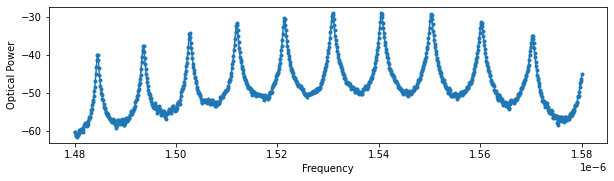

In [17]:
def P_w(wi,wf,steps,filename,wave=.00000155,power=0):
    '''
    wi=initial wavelength in m
    wf=final wavelength in m
    steps=number of steps inbetween wi and wf
    filename=name of file to save data
    wave=wavelength in m
    power=optical power in dbm
    '''
    domain=numpy.linspace(wi,wf,steps)
    Keithely.setCurrentMeasurementRange(10e-3,chan='a')
    Keithely.setCurrentLimit(10e-3,chan='a') 
    channel1.setwavelength(wave)
    channel1.set_output_power(power)
    channel1.setTLSState('on')
    testsweep = NdSweeper()
    testsweep.addActuation('Wavelength', lambda f: channel1.setwavelength(f),domain)
    testsweep.addMeasurement('Optical Power', lambda: channel1.readPWM(0,1))
    testsweep.gather(3)
    testsweep.saveObj(filename)
    testsweep.plot()
P_w(.00000148,.00000158,1000,'test_modular_pw')